In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# EDA

In [ ]:
data=pd.read_csv("/content/12 (2) (Data).csv")
data.head(5)
jumlah = len(data)
print(f"jumlah baris {jumlah}")

jumlah baris 1334


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["symbol"]=le.fit_transform(data["symbol"])
data["date"]=pd.to_datetime(data["date"])
data.set_index("date",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1334 entries, 2021-12-27 to 2018-05-04
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   symbol       1334 non-null   int64  
 2   open         1334 non-null   float64
 3   high         1334 non-null   float64
 4   low          1334 non-null   float64
 5   close        1334 non-null   float64
 6   Volume XRP   1334 non-null   float64
 7   Volume USDT  1334 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 93.8 KB


<Axes: xlabel='date', ylabel='close'>

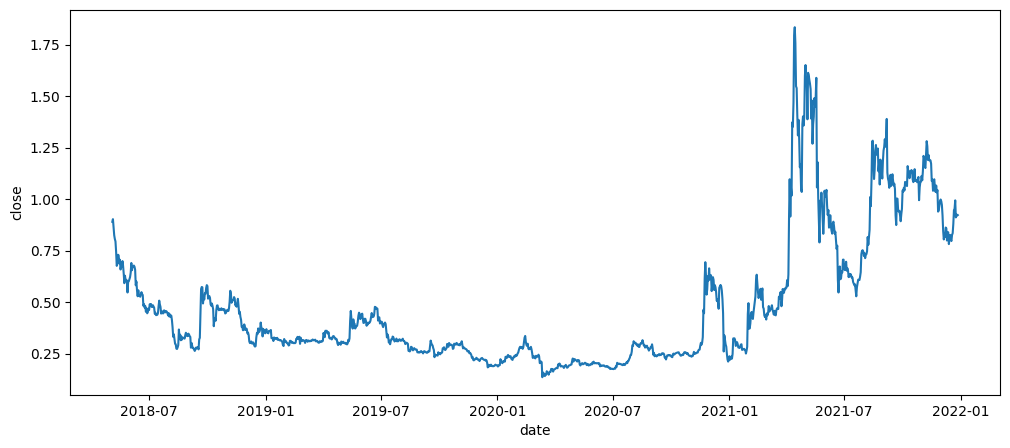

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x="date",y="close",data=data)

# Data Preprocessing

In [ ]:
df=data[["close"]].values

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [ ]:
def create_sequence(df,sequence_length):
    X=[]
    y=[]
    for i in range (sequence_length,len(df)):
        X.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(X),np.array(y)

In [ ]:
sequence_length=10

In [ ]:
X,y=create_sequence(scaler_data,sequence_length)

In [ ]:
X=X.reshape((X.shape[0],X.shape[1],1))
print(X.shape,y.shape)

(1324, 10, 1) (1324,)


# Model

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(50,activation="relu",input_shape=(X.shape[1],X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X,y,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0304
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epo

# Model Evaluation

In [ ]:
loss=model.evaluate(X,y)
print("Model loss:",loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Model loss: 0.00072333007119596


In [ ]:
predictions=model.predict(X)
predictions=scaler.inverse_transform(predictions)
print(predictions[:10])

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[0.82695806]
 [0.7987159 ]
 [0.7936464 ]
 [0.8074731 ]
 [0.80759734]
 [0.7912663 ]
 [0.8150562 ]
 [0.830224  ]
 [0.81426984]
 [0.83766824]]


In [ ]:
actual_values=scaler.inverse_transform(y.reshape(-1,1))

# Actual Vs Predicted

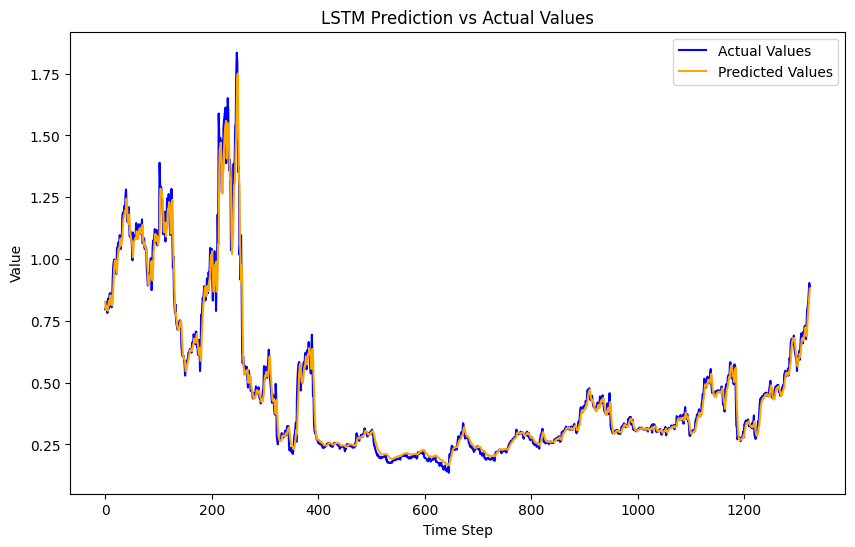

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values",color="blue")
plt.plot(predictions, label="Predicted Values",color="orange")
plt.legend()
plt.title('LSTM Prediction vs Actual Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()